In [15]:
import pandas as pd
import scipy.stats as stats
import seaborn as sns

In [2]:
# 1. Read the red wine data, which measures physical characteristics of wine, and whether people like the taste of the wine.  Note the use of the ‘sep’ parameter in read_csv().

wine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=";")
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [3]:
# 2. Make a small version of the data set named 'df' by selecting 20 random rows of it.  Use the small version until instructed otherwise.
df = wine.sample(20)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1139,8.2,0.510,0.24,2.00,0.079,16.0,86.0,0.99764,3.34,0.64,9.5,6
366,12.8,0.615,0.66,5.80,0.083,7.0,42.0,1.00220,3.07,0.73,10.0,7
1584,6.7,0.320,0.44,2.40,0.061,24.0,34.0,0.99484,3.29,0.80,11.6,7
1206,7.2,0.360,0.46,2.10,0.074,24.0,44.0,0.99534,3.40,0.85,11.0,7
1499,6.9,0.740,0.03,2.30,0.054,7.0,16.0,0.99508,3.45,0.63,11.5,6
1418,7.8,0.530,0.01,1.60,0.077,3.0,19.0,0.99500,3.16,0.46,9.8,5
741,9.2,0.530,0.24,2.60,0.078,28.0,139.0,0.99788,3.21,0.57,9.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
1189,8.8,0.955,0.05,1.80,0.075,5.0,19.0,0.99616,3.30,0.44,9.6,4
89,7.0,0.620,0.08,1.80,0.076,8.0,24.0,0.99780,3.48,0.53,9.0,5


In [4]:
# 3. Scale the data using Z score normalization.

z_scaled = (df - df.mean()) / df.std()
z_scaled

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1139,0.013083,-0.483631,0.082782,-0.442045,0.141991,0.160720,1.223650,0.307269,0.042404,0.258929,-0.860011,0.223607
366,2.420356,0.101744,2.014352,1.250420,0.400156,-0.715933,-0.095973,2.221401,-1.304538,0.906251,-0.286670,1.341641
1584,-0.771897,-1.542881,1.002577,-0.263891,-1.019751,0.939967,-0.335904,-0.868076,-0.207030,1.409724,1.548020,1.341641
1206,-0.510237,-1.319881,1.094557,-0.397507,-0.180715,0.939967,-0.035990,-0.658193,0.341724,1.769348,0.860011,1.341641
1499,-0.667233,0.798618,-0.883004,-0.308430,-1.471540,-0.715933,-0.875749,-0.767332,0.591158,0.187004,1.433352,0.223607
1418,-0.196245,-0.372131,-0.974983,-0.620200,0.012908,-1.105557,-0.785775,-0.800913,-0.855558,-1.035716,-0.516007,-0.894427
741,0.536403,-0.372131,0.082782,-0.174814,0.077449,1.329590,2.813195,0.408012,-0.606124,-0.244544,-0.860011,-0.894427
65,-0.510237,0.714993,-0.791024,0.738227,0.593779,-1.008151,-1.025706,-0.297194,0.391611,-1.539189,0.745343,-0.894427
1189,0.327075,1.997243,-0.791024,-0.531122,-0.116174,-0.910745,-0.785775,-0.313985,-0.157143,-1.179565,-0.745343,-2.012461
89,-0.614901,0.129619,-0.653055,-0.531122,-0.051633,-0.618527,-0.635818,0.374431,0.740818,-0.532243,-1.433352,-0.894427


In [5]:
# 4. In the scaled data, find the column minimums (a vector containing the minimum value for each column).
z_scaled.min()

fixed acidity          -1.661542
volatile acidity       -1.542881
citric acid            -1.020973
residual sugar         -0.798354
chlorides              -2.310576
free sulfur dioxide    -1.105557
total sulfur dioxide   -1.115681
density                -1.816747
pH                     -1.304538
sulphates              -1.539189
alcohol                -1.433352
quality                -2.012461
dtype: float64

In [6]:
# 5. Repeat, but for the column maximums.  Did you get the kinds of values you expected?
z_scaled.max()
# yes, I think?

fixed acidity           2.420356
volatile acidity        2.471118
citric acid             2.014352
residual sugar          3.432810
chlorides               1.884604
free sulfur dioxide     2.498460
total sulfur dioxide    2.813195
density                 2.221401
pH                      3.384815
sulphates               2.200896
alcohol                 2.580034
quality                 1.341641
dtype: float64

In [7]:
# 6. Scale the data again using unit-interval normalization.  Scale the original small data set, not the version you just normalized.
unit_norm = (df - df.min()) / (df.max() - df.min())
unit_norm

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1139,0.410256,0.263889,0.363636,0.084211,0.584615,0.351351,0.595420,0.525988,0.287234,0.480769,0.142857,0.666667
366,1.000000,0.409722,1.000000,0.484211,0.646154,0.108108,0.259542,1.000000,0.000000,0.653846,0.285714,1.000000
1584,0.217949,0.000000,0.666667,0.126316,0.307692,0.567568,0.198473,0.234927,0.234043,0.788462,0.742857,1.000000
1206,0.282051,0.055556,0.696970,0.094737,0.507692,0.567568,0.274809,0.286902,0.351064,0.884615,0.571429,1.000000
1499,0.243590,0.583333,0.045455,0.115789,0.200000,0.108108,0.061069,0.259875,0.404255,0.461538,0.714286,0.666667
1418,0.358974,0.291667,0.015152,0.042105,0.553846,0.000000,0.083969,0.251559,0.095745,0.134615,0.228571,0.333333
741,0.538462,0.291667,0.363636,0.147368,0.569231,0.675676,1.000000,0.550936,0.148936,0.346154,0.142857,0.333333
65,0.282051,0.562500,0.075758,0.363158,0.692308,0.027027,0.022901,0.376299,0.361702,0.000000,0.542857,0.333333
1189,0.487179,0.881944,0.075758,0.063158,0.523077,0.054054,0.083969,0.372141,0.244681,0.096154,0.171429,0.000000
89,0.256410,0.416667,0.121212,0.063158,0.538462,0.135135,0.122137,0.542620,0.436170,0.269231,0.000000,0.333333


In [8]:
# 7. Again, find the column mins and maxes.  Did you get what you expected?
unit_norm.max()

fixed acidity           1.0
volatile acidity        1.0
citric acid             1.0
residual sugar          1.0
chlorides               1.0
free sulfur dioxide     1.0
total sulfur dioxide    1.0
density                 1.0
pH                      1.0
sulphates               1.0
alcohol                 1.0
quality                 1.0
dtype: float64

In [9]:
# 7 continued
unit_norm.min()

# Yes

fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
dtype: float64

In [14]:
# 8. Now we’ll return to the full data set.  Use 'df = wine' to assign 'wine' to variable 'df', then compute the correlation coefficient for  Use function pandas.dataframe.corr(r) to see how the features are correlated.
df = wine
corr = df.corr()
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


### 9. Looking at the matrix of correlations, which features are the most positively correlated?  (Don't consider the correlation between a feature and itself.)  Which are the most negatively correlated?

- **Fixed acidity** has a stronger corr with **density** and **citric acid**
- **Free sulfure diaoxide** and **total sulfur dioxide**
I only included those with a correlation greater than .60

<AxesSubplot:>

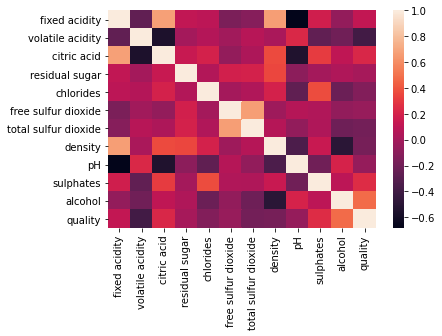

In [17]:
# 10. Display the correlations with a plot, and answer the questions of the previous problem again.
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

In [12]:
# 11. Which features are most correlated to the ‘quality’ variable?  Express what you find in plain English?

In [13]:
# 12. Is the wine data tidy?